# Air Quality Sensor Results

My wife suffers from moderate to severe eczema which flared up substantially after moving into a new apartment.  One possible cause is indoor air quality, influenced by the boiler room or the carpet.  In the course of pursuing other options, we set up a number of air-quality sensors to record over time.  This shows the main results.  Total voltatile organic compounds were detected in different concentrations that varied substantially over time.  A dedicated formaldehyde sensor similarly had time varying signals.  Opening a window caused such signals to drop precipitously, showing the impact of open ventiliation.  

[Examples of TVOC Spikes](#examples)

[Sensor Correlation](#correlation)

All air sensors interfaced with an Arduino Uno. 

SGP30: an air quality sensor; breakout board by Adafruit
 
SI7021: Humidity and temperature sensor; breakout board by Adafruit.
  
Gravity: Formaldehyde (HCHO) sensor, breakout board by DFRobot; sensor unknown.

MQ-X: a suite of eight different air sensors.   

The SPG30 and Si7021 sensors communicate over I2C; the Gravity
sensor uses UART communication on a single digital pin
(facilitated by SoftwareSerial package).

The MQ sensors are analog output. In order to read all eight
simultaneously, they are digitized by a MCP3008 chip.  

Data was collected between May 28 and July 30, 2019.  On July 31, we moved apartments

In [1]:
import numpy as np
import pandas as pd
import networkx
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import os
import subprocess

import SuitePanda
import read_formatted
import generate_figures

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]

In [4]:
#find all data files of the type 'suite'
findfiles = subprocess.run(['ls /home/rory/Arduino/python/archive/suite*'],
                            stdout=subprocess.PIPE,
                            shell=True)
fullpaths = findfiles.stdout.decode('utf-8').split('\n')
files = [fullpath.split('python/')[1] for fullpath in fullpaths[0:-2]]

In [5]:
#use newer (faster) read_formatted.read_panda to read data into pandas

justfiles = [f.split('/')[1] for f in files]
SweetPanda = read_formatted.read_panda(justfiles[1])
for f in justfiles[2:]:
    SweetPanda = SweetPanda.append(read_formatted.read_panda(f))

In [6]:
def my_annotate(ax,text,xy=(0,0),xytext=(0,0)):
    ax.annotate(text, 
                xytext=xytext, 
                xy = xy,
                ha='center',
                xycoords='axes fraction',
                fontsize=14,
                arrowprops={'facecolor':'black'})

## Daily Mean and Max

In [7]:
mean = generate_figures.get_stat('mean')
std  = generate_figures.get_stat('std')
maxi = generate_figures.get_stat('max')

for x in [mean,std,maxi]:
    x.sort_index(inplace=True)

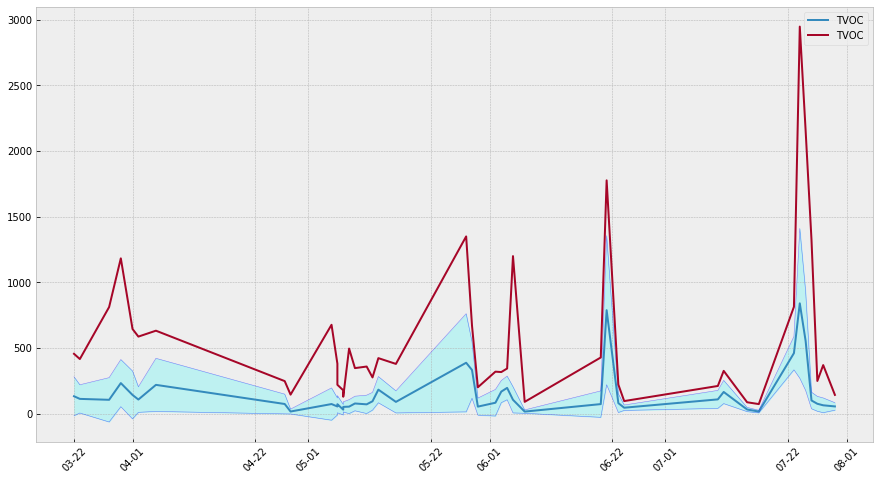

In [8]:
fig,ax = generate_figures.plot_datatype('TVOC', mean, std, maxi)

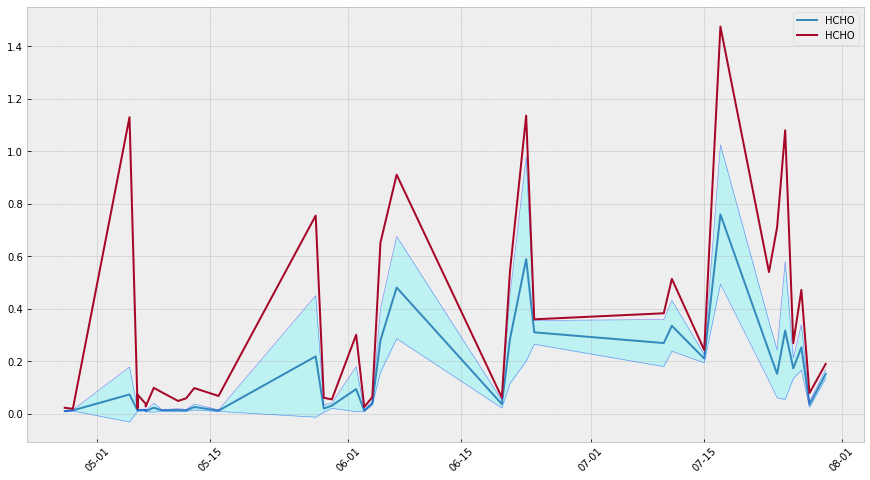

In [25]:
fig,ax = generate_figures.plot_datatype('HCHO', mean, std, maxi)

## Examples of TVOC Spikes
<a id="examples"></a>

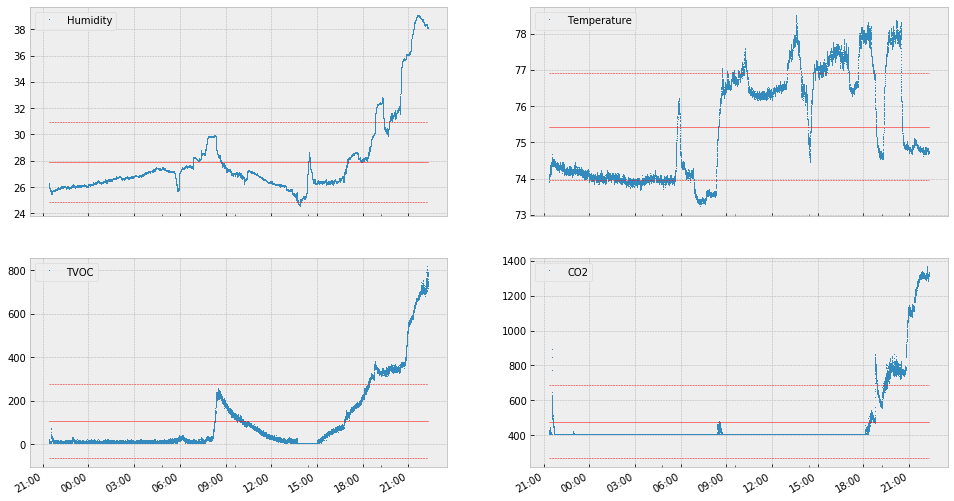

In [9]:
p = read_formatted.read_panda('htv20190328.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')

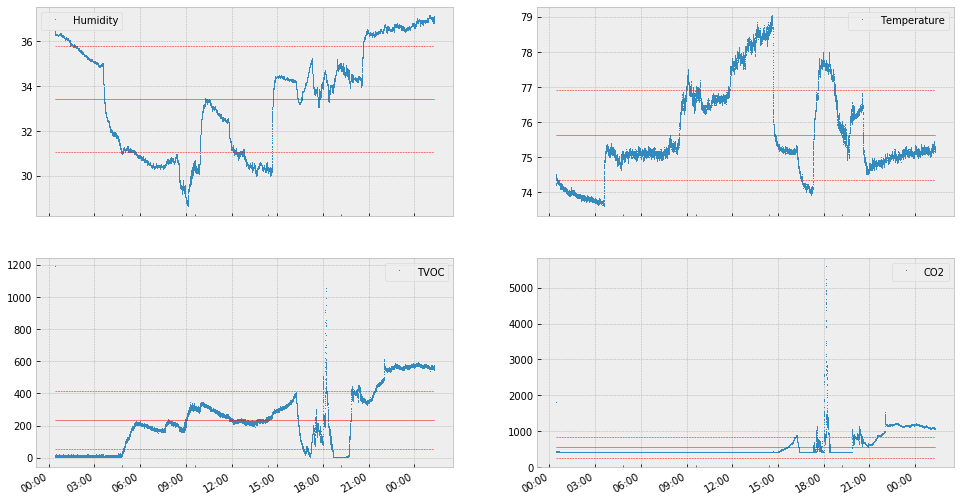

In [10]:
p = read_formatted.read_panda('htv20190330.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')

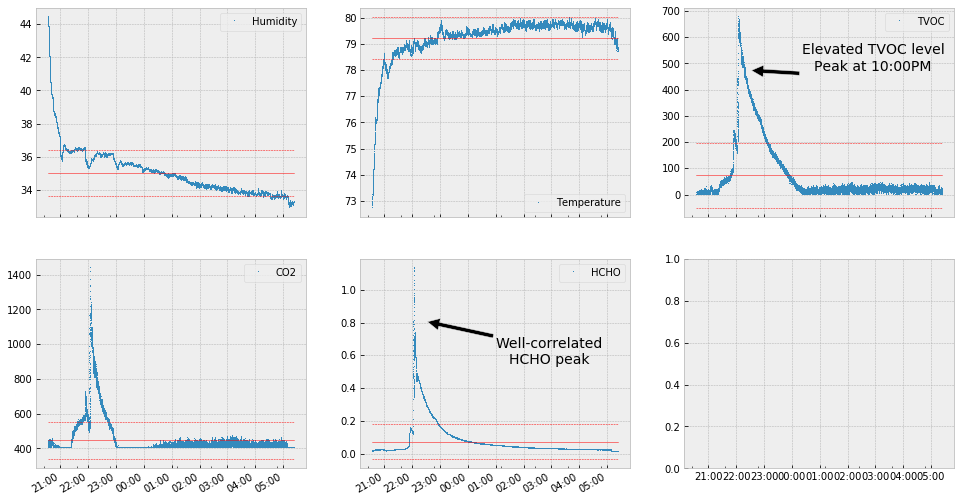

In [11]:
p = read_formatted.read_panda('hcho20190505.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
my_annotate(axarr[0][2], 
            'Elevated TVOC level\nPeak at 10:00PM',
            xytext=(0.7,0.7),
            xy=(0.25,0.7) )
my_annotate(axarr[1][1],
            'Well-correlated\nHCHO peak', 
            xytext=(0.7,0.5),
            xy = (0.25,0.7))

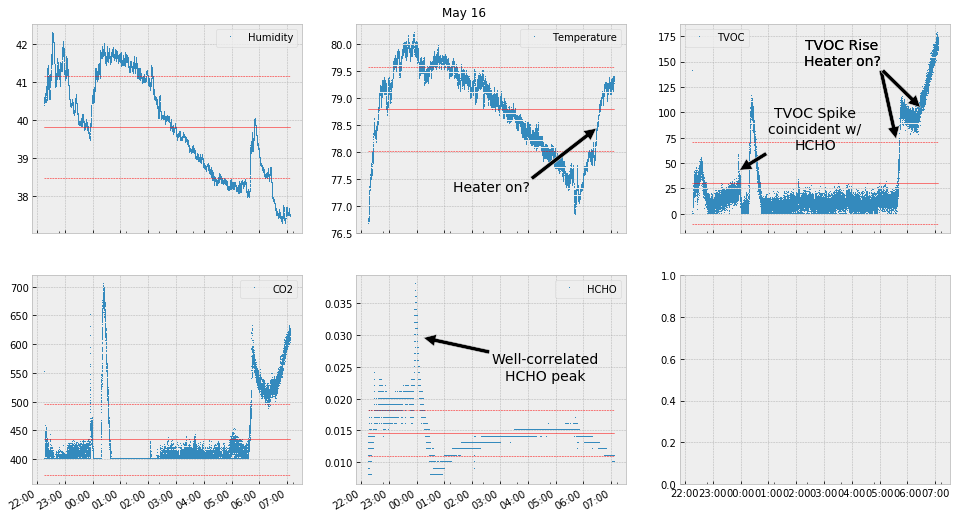

In [7]:
p = read_formatted.read_panda('hcho20190507.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
fig.suptitle('May 16')
#TVOC annotations
my_annotate(axarr[0][2], 'TVOC Spike\ncoincident w/\nHCHO',xytext=(0.5,0.4),xy=(0.22,0.3) )
my_annotate(axarr[0][2], 'TVOC Rise\nHeater on?',xytext=(0.6,0.8),xy=(0.8,0.45) )
my_annotate(axarr[0][2], 'TVOC Rise\nHeater on?',xytext=(0.6,0.8),xy=(0.89,0.6) )
#Temperature annotations
my_annotate(axarr[0][1],'Heater on?', xytext=(0.5,0.2), xy=(0.89,0.5) )
my_annotate(axarr[1][1],'Well-correlated\nHCHO peak', xytext=(0.7,0.5),xy = (0.25,0.7))

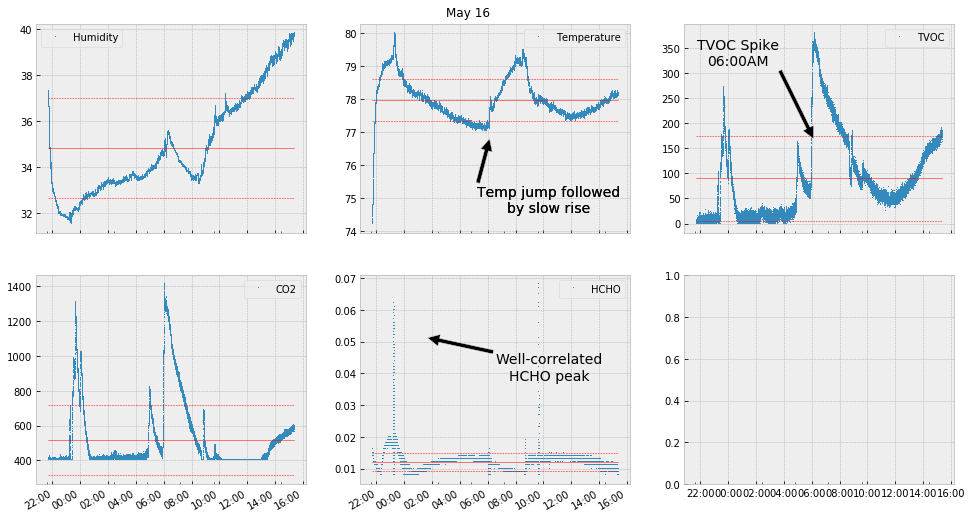

In [8]:
p = read_formatted.read_panda('hcho20190516.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
fig.suptitle('May 16')
my_annotate(axarr[0][2], 'TVOC Spike\n06:00AM',xytext=(0.2,0.8),xy=(0.48,0.45) )
my_annotate(axarr[0][1],'Temp jump followed\nby slow rise', xytext=(0.7,0.1), xy=(0.48,0.45) )
my_annotate(axarr[0][1],'Temp jump followed\nby slow rise', xytext=(0.7,0.1), xy=(0.48,0.45) )
my_annotate(axarr[1][1],
            'Well-correlated\nHCHO peak', 
            xytext=(0.7,0.5),
            xy = (0.25,0.7))

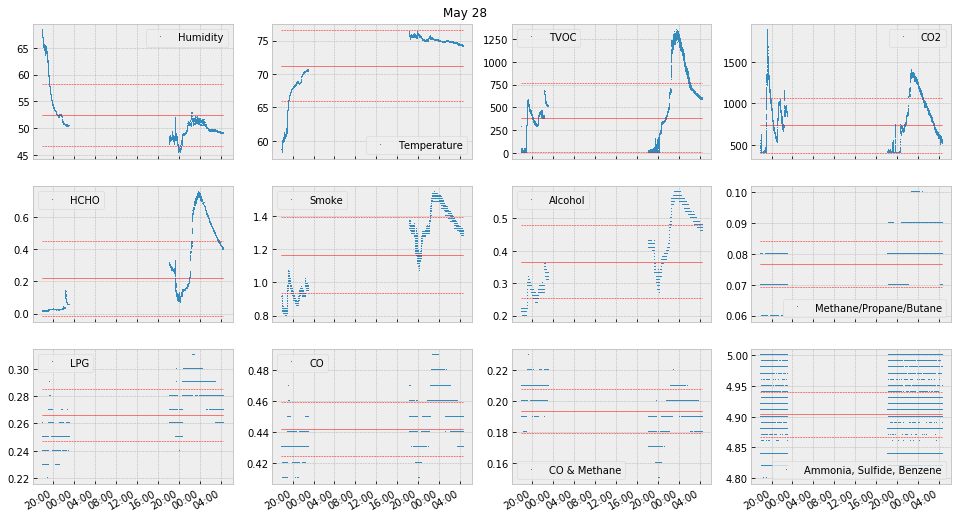

In [14]:
p = read_formatted.read_panda('suite20190528.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
_ = fig.suptitle('May 28')

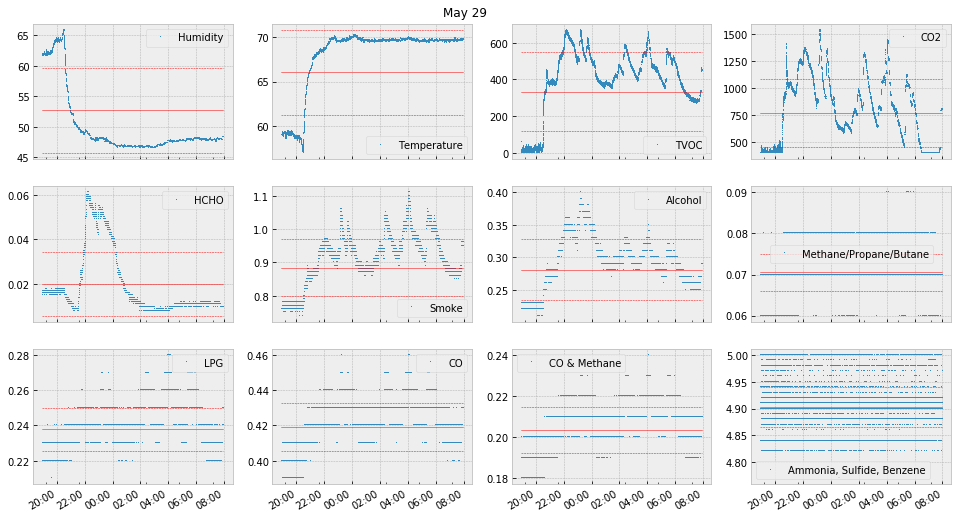

In [12]:
p = read_formatted.read_panda('suite20190529.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
_ = fig.suptitle('May 29')


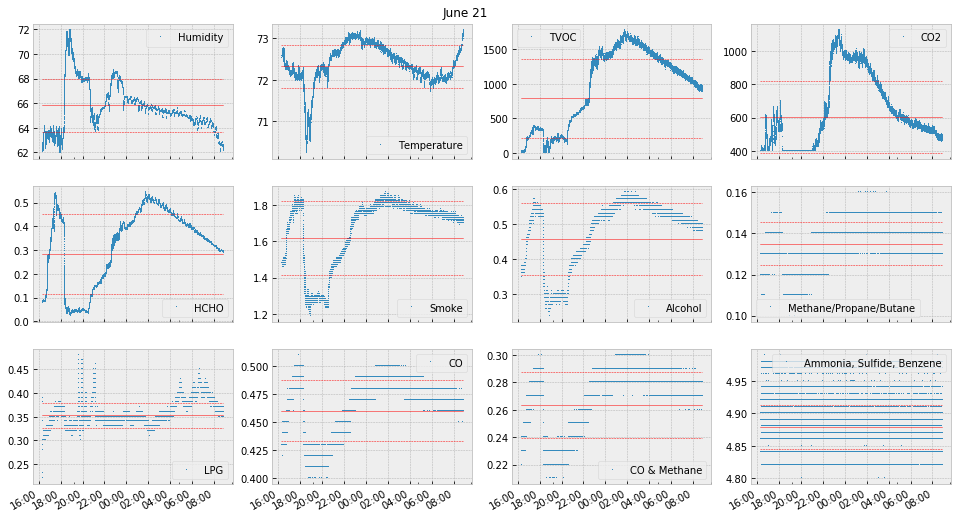

In [15]:
p = read_formatted.read_panda('suite20190621.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
_ = fig.suptitle('June 21')

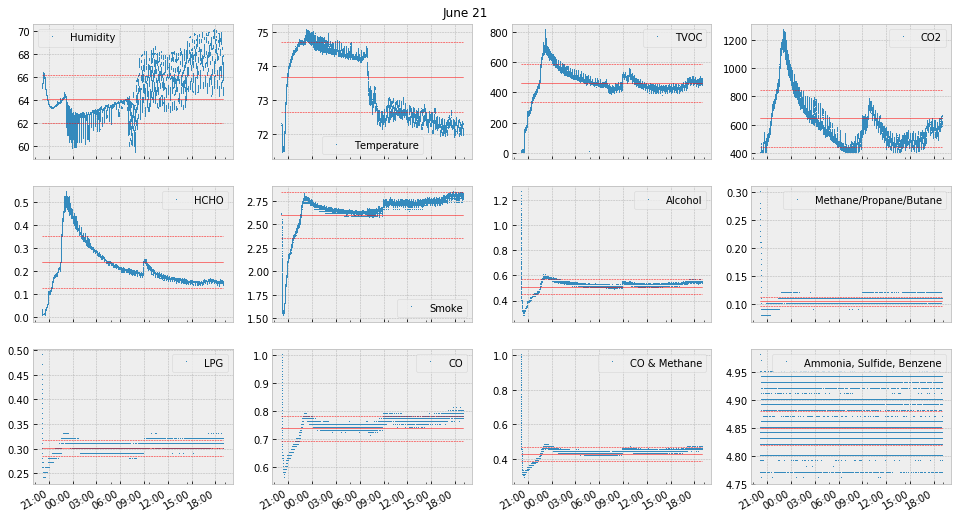

In [20]:
p = read_formatted.read_panda('suite20190723.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
_ = fig.suptitle('July 21')

Here, there is a large spike shortly before 23:00.  It is seen by multiple sensors.

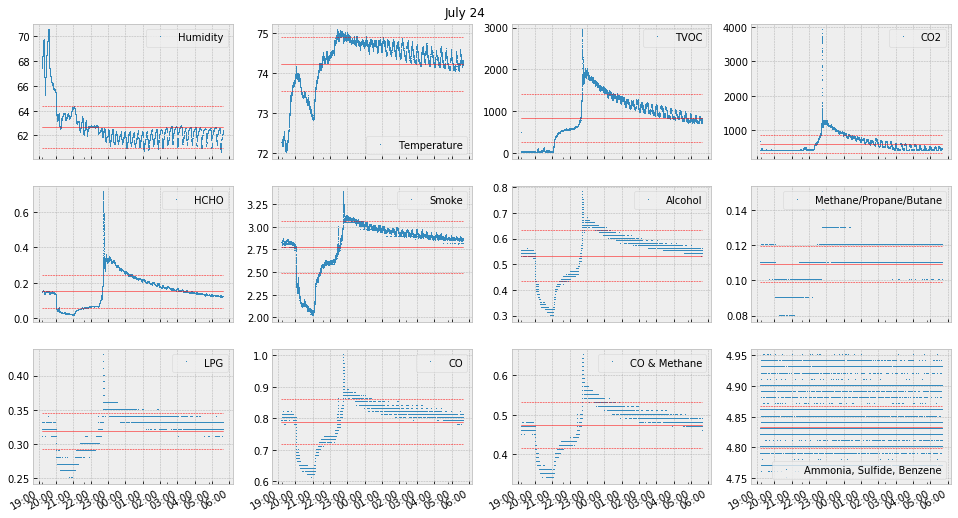

In [23]:
p = read_formatted.read_panda('suite20190724.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
_ = fig.suptitle('July 24')

## HCHO Examples

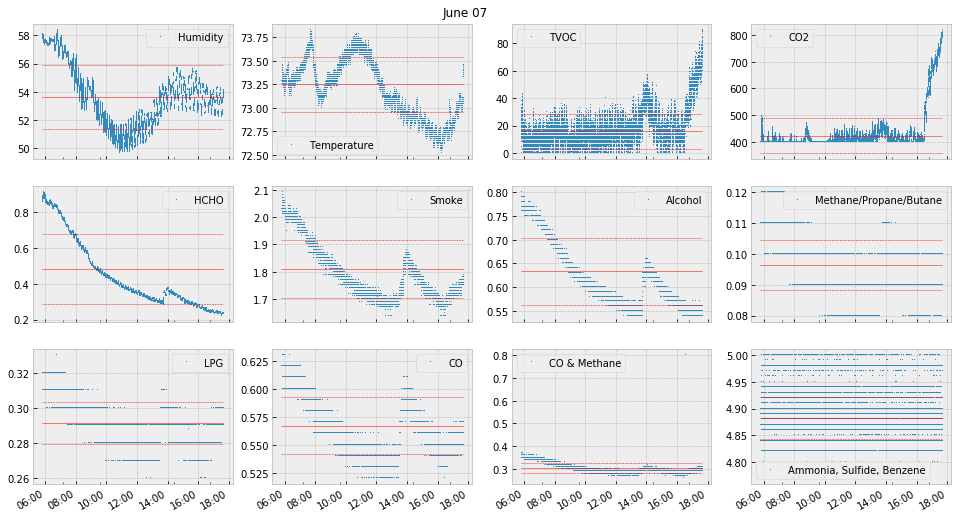

In [9]:
p = read_formatted.read_panda('suite20190607.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
_ = fig.suptitle('June 07')

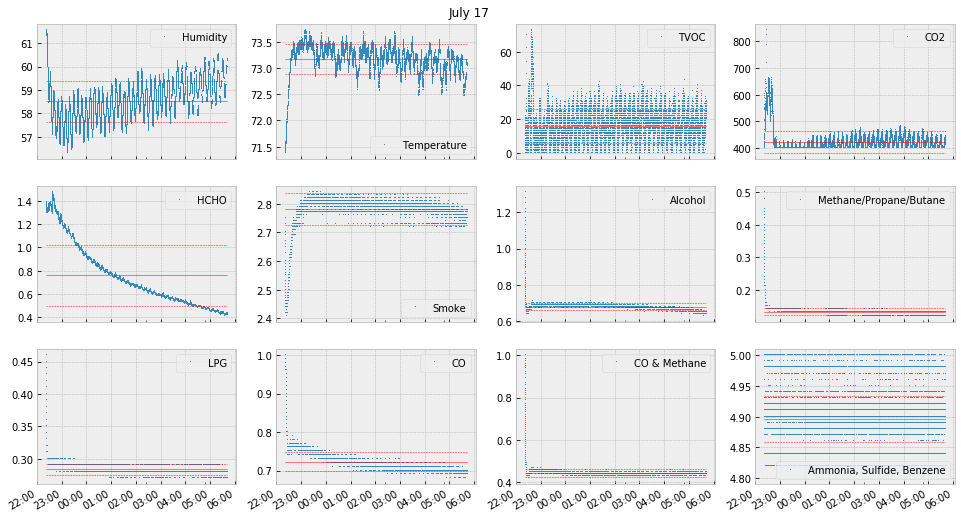

In [10]:
p = read_formatted.read_panda('suite20190717.txt')
fig,axarr = p.suite.SuitePlot(format='%H:%M')
_ = fig.suptitle('July 17')

## Sensor Correlation
<a id="correlation"></a>

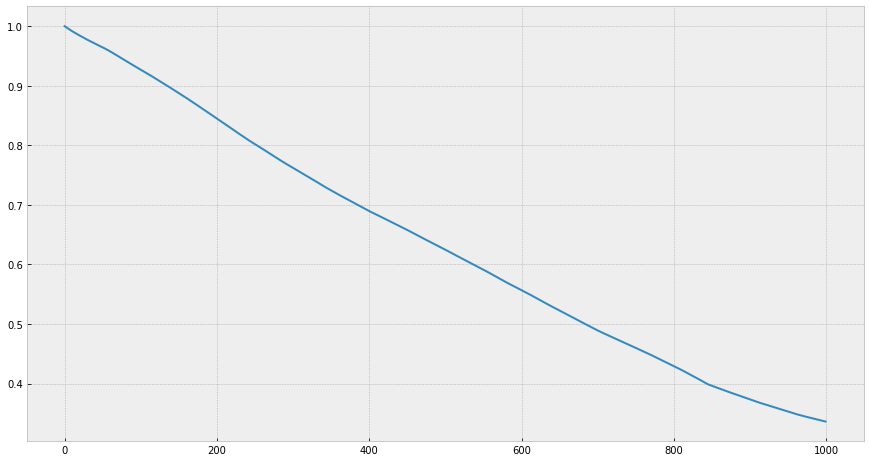

In [19]:
ac = np.zeros(1000)
a = SweetPanda['TVOC']
for i in range(1000):
    ac[i] = a.autocorr(lag=10*i)
plt.plot(ac)

In [14]:
SweetPanda.corr()

,Humidity,Temperature,TVOC,CO2,HCHO,Smoke,Alcohol,Methane/Propane/Butane,LPG,CO,Hydrogen,CO & Methane,"Ammonia, Sulfide, Benzene"
Humidity,1.000000,-0.153181,0.138008,0.028346,0.065872,0.516077,0.256861,0.579467,0.475297,0.461492,0.497822,0.486594,-0.327890
Temperature,-0.153181,1.000000,0.010637,-0.061772,0.100903,0.247555,0.292954,0.148281,0.166733,0.179359,0.103995,0.156045,-0.071261
TVOC,0.138008,0.010637,1.000000,0.630170,0.119716,0.207826,0.135418,0.137912,0.121802,0.152574,0.219739,0.197154,-0.186753
CO2,0.028346,-0.061772,0.630170,1.000000,0.151360,0.133075,0.146076,0.022660,0.054112,0.122976,0.192384,0.200459,-0.121364
HCHO,0.065872,0.100903,0.119716,0.151360,1.000000,0.433185,0.721466,0.519288,0.389782,0.305719,0.156552,0.380785,0.001182
Smoke,0.516077,0.247555,0.207826,0.133075,0.433185,1.000000,0.850408,0.629066,0.596278,0.967392,0.910587,0.971623,-0.449926
Alcohol,0.256861,0.292954,0.135418,0.146076,0.721466,0.850408,1.000000,0.633593,0.622522,0.791398,0.638556,0.823804,-0.268968
Methane/Propane/Butane,0.579467,0.148281,0.137912,0.022660,0.519288,0.629066,0.633593,1.000000,0.908408,0.533526,0.439157,0.568031,-0.224662
LPG,0.475297,0.166733,0.121802,0.054112,0.389782,0.596278,0.622522,0.908408,1.000000,0.539503,0.446309,0.551066,-0.241969
CO,0.461492,0.179359,0.152574,0.122976,0.305719,0.967392,0.791398,0.533526,0.539503,1.000000,0.962058,0.986192,-0.484979


In [9]:
np.where(corr> 0.5, 1, 0)

array([[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]])

In [33]:
corr = np.abs( np.asmatrix(SweetPanda.corr()) )
corr = np.where(np.abs(corr) > 0.6, 1, 0)
g = networkx.from_numpy_matrix(corr)
g =  networkx.relabel_nodes(g, lambda  x: SweetPanda.columns[x])

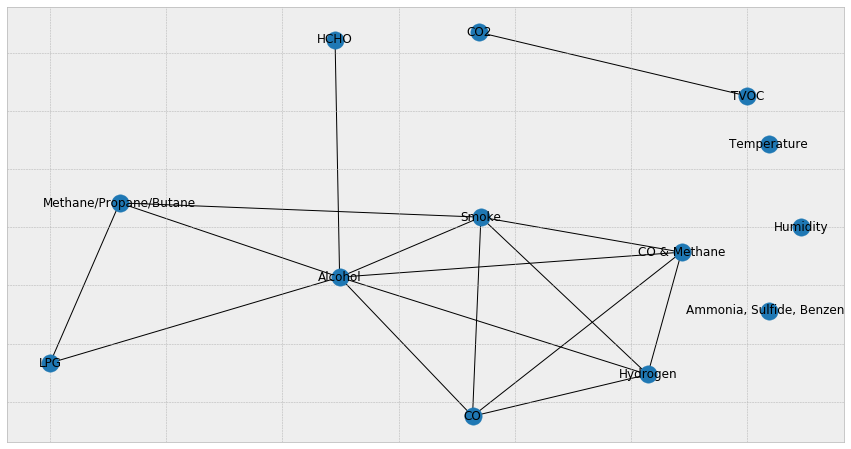

In [34]:
networkx.draw_networkx(g, pos=networkx.drawing.layout.kamada_kawai_layout(g),with_labels=True)

In [44]:
submat = SweetPanda[["Smoke", "Alcohol", "Hydrogen", "CO"]]
subcorr = np.asmatrix( submat.corr() )
print(subcorr)
val, vec = np.linalg.eig(subcorr)
print(val)
print(vec[0])
submat.max()

[[1.         0.85040841 0.91058705 0.96739183]
 [0.85040841 1.         0.63855639 0.79139839]
 [0.91058705 0.63855639 1.         0.96205796]
 [0.96739183 0.79139839 0.96205796 1.        ]]
[3.57014603 0.38541344 0.0319444  0.01249613]
[[-0.52307813 -0.01822983 -0.84749739 -0.08834655]]


Smoke       3.53
Alcohol     1.31
Hydrogen    0.63
CO          1.00
dtype: float64

In [17]:
edges, weights = zip(*networkx.get_edge_attributes(g,'weight').items())

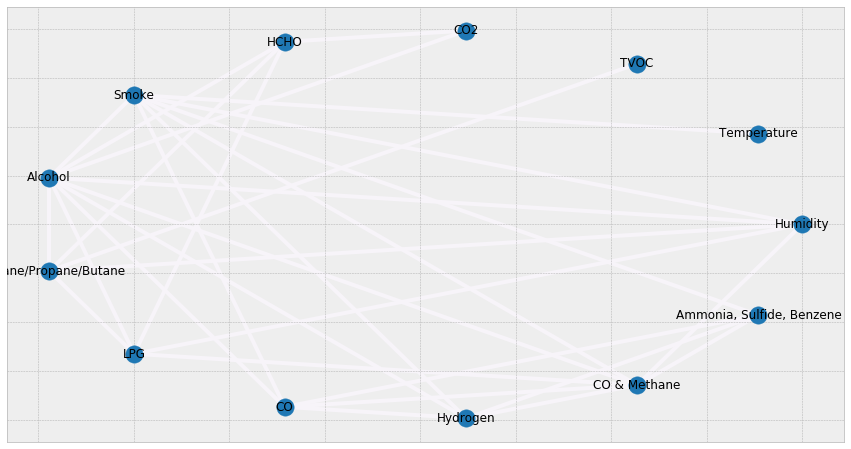

In [18]:
weights = [(1+abs(w))**2 for w in networkx.get_edge_attributes(g,'weight').values()]
networkx.draw_networkx_nodes(g, 
                             networkx.circular_layout(g)
                            )
networkx.draw_networkx_edges(g, 
                             networkx.circular_layout(g), 
                             edgelist=edges, 
                             width=weights, 
                             edge_color=weights, 
                             edge_cmap=plt.cm.PuRd
                            )
_=networkx.draw_networkx_labels(g, 
                                networkx.circular_layout(g), 
                                font_size=12, 
                                font_family='sans-serif'
                               )
#networkx.draw_networkx_edges(g, networkx.circular_layout(g), edgelist=edges, width=weights)

In [135]:
L = networkx.laplacian_matrix(g)
e,v = np.linalg.eig(L.A)

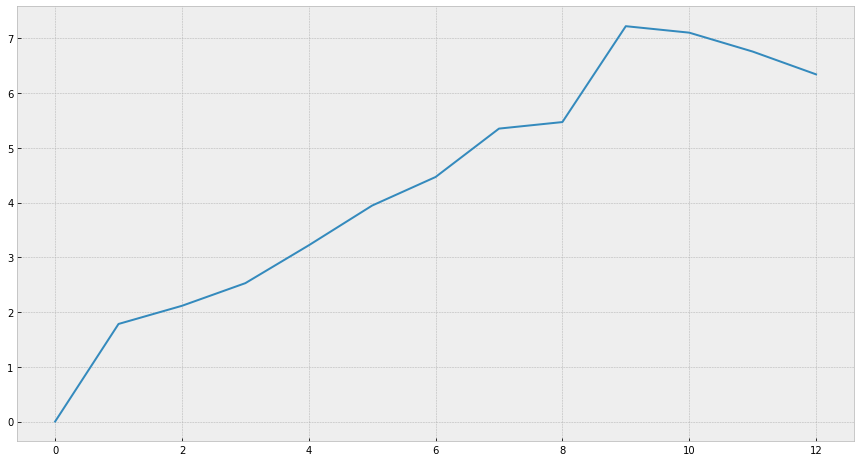

In [136]:
plt.plot(e)

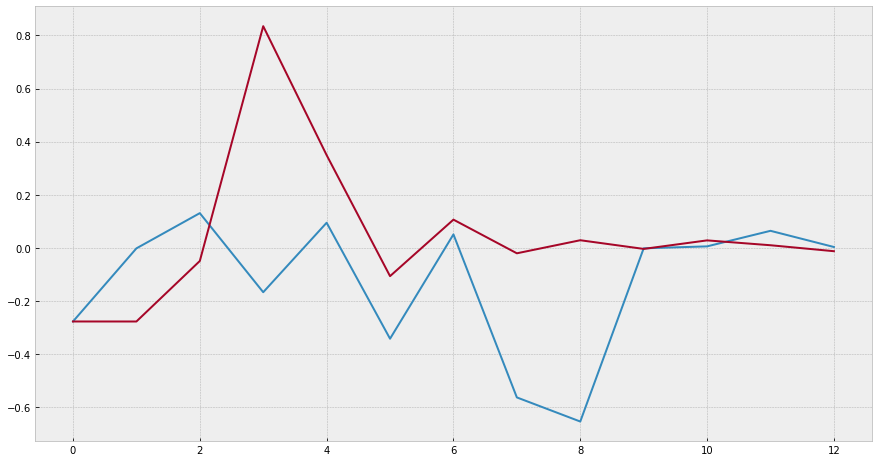

In [137]:
plt.plot(v[0])
plt.plot(v[1])

From the giant correlation matrix above, the point of adding the MQ sensors was to determine what, if anything, was correlated with the TVOC and HCHO signals.  

The strongest correlation with TVOC was CO2, but this should be viewed with suspicion, as both measurements come from the same sensor.   TVOC was weakly correlated with a number of the MQ sensors, but the correlation in down around 0.2.

HCHO, on the otherhand, was well correlated with the 'Alcohol' MQ sensor (0.72) and also with Methane/Propane/Butane (0.51) and a number of other sensors at lower levels.  Interestingly, the TVOC and HCHO sensors were not well correlated 

In [34]:
subpanda = SweetPanda[ADC_channel_names]
M = subpanda.corr()

In [8]:
SweetPanda.columns

Index(['Humidity', 'Temperature', 'TVOC', 'CO2', 'HCHO', 'Smoke', 'Alcohol',
       'Methane/Propane/Butane', 'LPG', 'CO', 'Hydrogen', 'CO & Methane',
       'Ammonia, Sulfide, Benzene'],
      dtype='object')

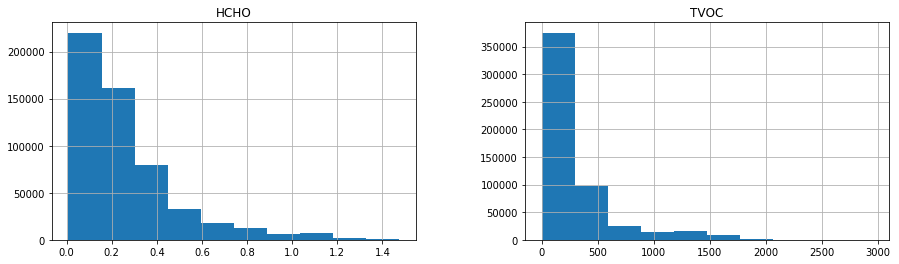

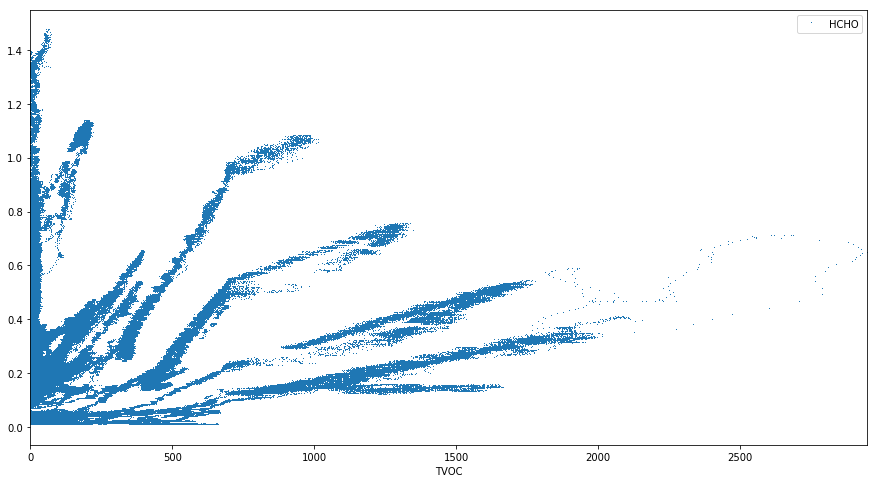

In [37]:
SweetPanda.hist(column=['TVOC','HCHO'],
               figsize=(15,4))
SweetPanda.plot(x='TVOC', y="HCHO", style=',')

Let's try something a little different.  In general, we observe periods of heightened TVOC signals seperated by "uninteresting" periods of low signal.  We can only consider times when the signal is elevated and look for correlation.

In [37]:
subpanda = SweetPanda[SweetPanda.TVOC > 300]
print("subpanda shape: ",subpanda.shape, "vs orginal shape", SweetPanda.shape)

subpanda shape:  (162477, 13) vs orginal shape (562526, 13)


In [38]:
subpanda.corr()

,Humidity,Temperature,TVOC,CO2,HCHO,Smoke,Alcohol,Methane/Propane/Butane,LPG,CO,Hydrogen,CO & Methane,"Ammonia, Sulfide, Benzene"
Humidity,1.000000,0.194083,0.112551,-0.100122,0.285891,0.695307,0.581033,0.792448,0.718927,0.584681,0.581406,0.644423,-0.423035
Temperature,0.194083,1.000000,0.219477,-0.222391,0.257085,0.452755,0.316528,0.237213,0.221034,0.352483,0.324996,0.295138,-0.255035
TVOC,0.112551,0.219477,1.000000,0.307377,0.240258,0.091507,0.236940,0.415130,0.380710,0.000575,-0.051683,0.057093,-0.038017
CO2,-0.100122,-0.222391,0.307377,1.000000,0.484777,0.001060,0.320939,0.074380,0.157916,-0.010998,-0.011488,0.136643,0.068478
HCHO,0.285891,0.257085,0.240258,0.484777,1.000000,0.312145,0.743348,0.559588,0.598970,0.181209,0.113541,0.336821,-0.072040
Smoke,0.695307,0.452755,0.091507,0.001060,0.312145,1.000000,0.810149,0.532851,0.591523,0.973137,0.954327,0.968066,-0.598401
Alcohol,0.581033,0.316528,0.236940,0.320939,0.743348,0.810149,1.000000,0.698383,0.781744,0.777653,0.670065,0.834817,-0.427475
Methane/Propane/Butane,0.792448,0.237213,0.415130,0.074380,0.559588,0.532851,0.698383,1.000000,0.889799,0.366140,0.320493,0.506147,-0.300844
LPG,0.718927,0.221034,0.380710,0.157916,0.598970,0.591523,0.781744,0.889799,1.000000,0.468042,0.404094,0.595268,-0.331765
CO,0.584681,0.352483,0.000575,-0.010998,0.181209,0.973137,0.777653,0.366140,0.468042,1.000000,0.979524,0.988485,-0.588087


Now there is a relativele strong correlation between TVOC and Methane/Propane/Butane and LPG.  

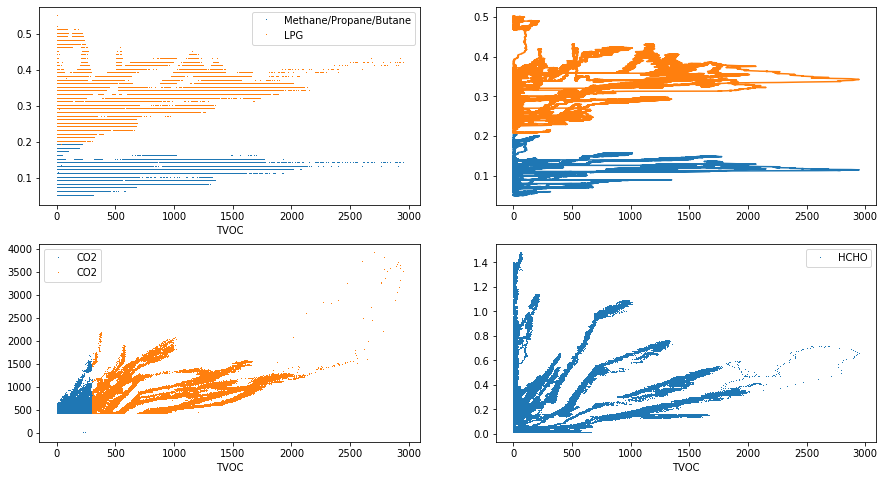

In [52]:
fig,axs = plt.subplots(2,2)
SweetPanda.plot(x='TVOC', y=["Methane/Propane/Butane","LPG"], style=',', ax=axs[0][0])
axs[0][1].plot( SweetPanda.TVOC, SweetPanda['Methane/Propane/Butane'].rolling(window=200).mean())
axs[0][1].plot( SweetPanda.TVOC, SweetPanda.LPG.rolling(window=200).mean())
SweetPanda.plot(x='TVOC', y=["CO2"], style=',', ax=axs[1][0])
subpanda.plot(x='TVOC', y=["CO2"], style=',', ax=axs[1][0])
SweetPanda.plot(x='TVOC', y=["HCHO"], style=',', ax=axs[1][1])


The plot of TVOC vs HCHO is particularly interesting as it indicates that there are times when HCHO is high while TVOC is not.  

In [55]:
subpanda = SweetPanda[SweetPanda.HCHO > 0.2]
print("subpanda shape: ",subpanda.shape, "vs orginal shape", SweetPanda.shape)

subpanda shape:  (257476, 13) vs orginal shape (562526, 13)


In [56]:
subpanda.corr()

,Humidity,Temperature,TVOC,CO2,HCHO,Smoke,Alcohol,Methane/Propane/Butane,LPG,CO,Hydrogen,CO & Methane,"Ammonia, Sulfide, Benzene"
Humidity,1.000000,-0.581059,0.383094,0.387771,-0.005606,0.662158,0.321860,0.483837,0.370497,0.603221,0.695217,0.676063,-0.416519
Temperature,-0.581059,1.000000,0.017772,0.043897,-0.038374,-0.265670,-0.311829,-0.374745,-0.280304,-0.280874,-0.282609,-0.334813,0.215514
TVOC,0.383094,0.017772,1.000000,0.692623,-0.011331,0.042293,-0.152784,0.072983,0.042653,-0.030488,0.118342,0.062120,-0.194943
CO2,0.387771,0.043897,0.692623,1.000000,0.150544,0.301459,0.169013,0.048058,0.080797,0.269191,0.407437,0.381046,-0.291731
HCHO,-0.005606,-0.038374,-0.011331,0.150544,1.000000,0.158689,0.553589,0.346464,0.091406,-0.020289,-0.077886,0.152699,0.111104
Smoke,0.662158,-0.265670,0.042293,0.301459,0.158689,1.000000,0.700812,0.417296,0.328509,0.948542,0.912658,0.973620,-0.364493
Alcohol,0.321860,-0.311829,-0.152784,0.169013,0.553589,0.700812,1.000000,0.451243,0.390664,0.610489,0.480934,0.730229,-0.148471
Methane/Propane/Butane,0.483837,-0.374745,0.072983,0.048058,0.346464,0.417296,0.451243,1.000000,0.880853,0.314384,0.273691,0.379278,-0.113526
LPG,0.370497,-0.280304,0.042653,0.080797,0.091406,0.328509,0.390664,0.880853,1.000000,0.305862,0.276528,0.327143,-0.155411
CO,0.603221,-0.280874,-0.030488,0.269191,-0.020289,0.948542,0.610489,0.314384,0.305862,1.000000,0.966774,0.970804,-0.414253


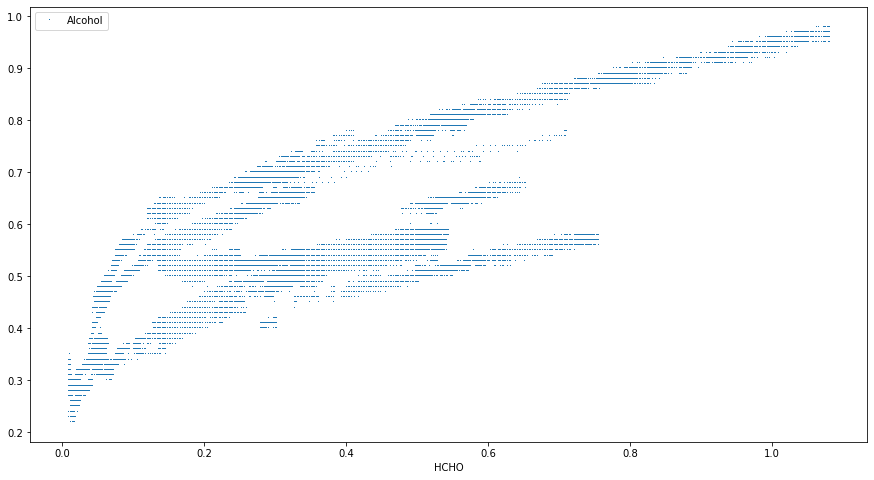

In [29]:
fix,axs = plt.subplots(2,2)
SweetPanda.plot(x='HCHO', y='Alcohol', ax=axs[0][0])
subpanda.plot(x='HCHO', y='Alcohol', style=',', ax=axs[0][0])
SweetPanda.plot(x='HCHO', y='Me', ax=axs[0][0])
subpanda.plot(x='HCHO', y='Alcohol', style=',', ax=axs[0][0])

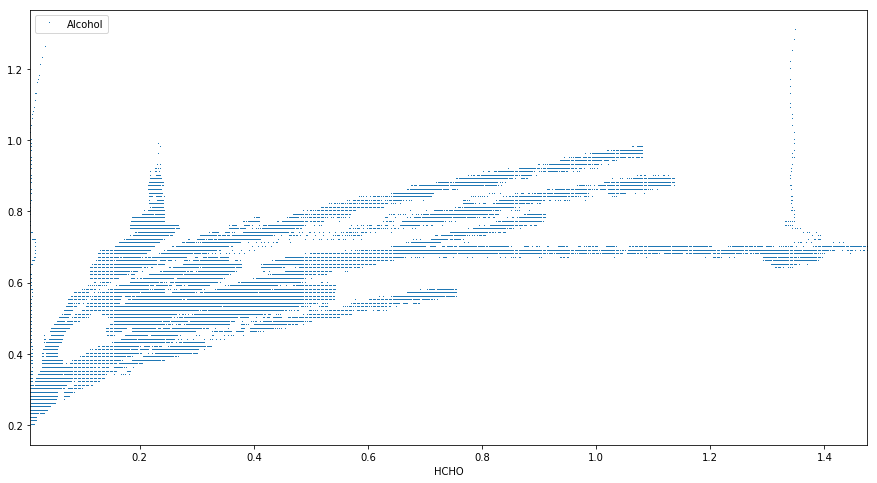

In [38]:
SweetPanda.plot(x='HCHO', y='Alcohol', style=',')

## Daily Plots

/home/rory/Arduino/python/SuitePanda.py:169: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


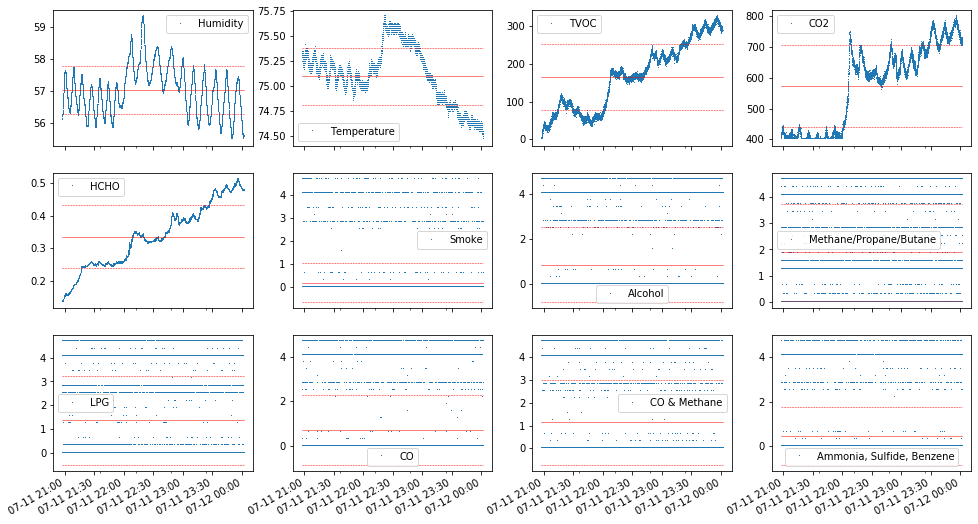

In [28]:
jul11 = SuitePanda.fileload('archive/suite20190711.txt')
jul11.suite.SuitePlot()

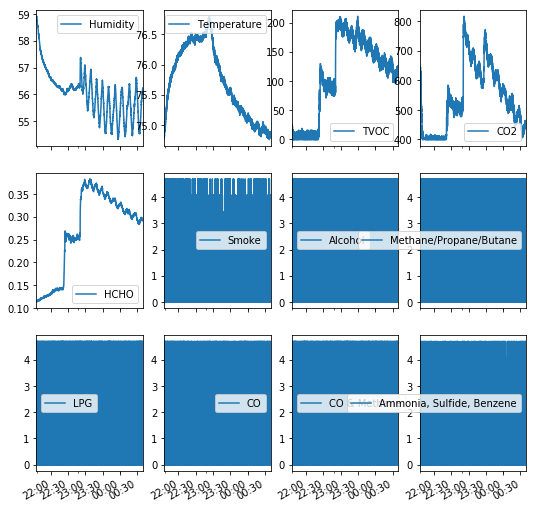

In [22]:
jul10 = SuitePanda.fileload('archive/suite20190710.txt')
jul10.suite.SuitePlot()

In [31]:
midjune = SuitePanda.fileload('archive/suite20190620.txt')
midjune = midjune.append(SuitePanda.fileload('archive/suite20190621.txt'))
midjune = midjune.append(SuitePanda.fileload('archive/suite20190623.txt'))
midjune = midjune.append(SuitePanda.fileload('archive/suite20190624.txt'))

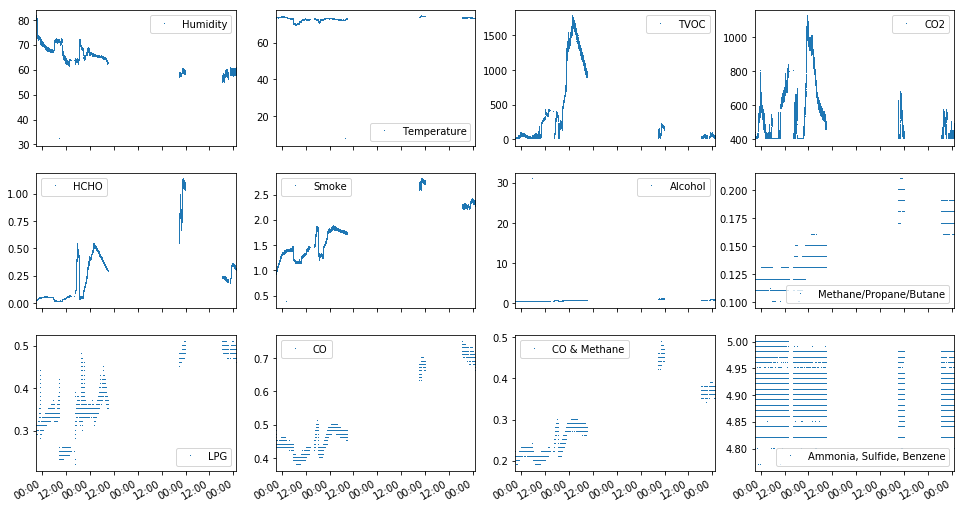

In [22]:
midjune.suite.SuitePlot()

In [28]:
earlyjune = SuitePanda.fileload('archive/suite20190602.txt')
for day in ['3','4','5','7']:
    earlyjune = earlyjune.append(SuitePanda.fileload('archive/suite2019060'+day+'.txt'))


/home/rory/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


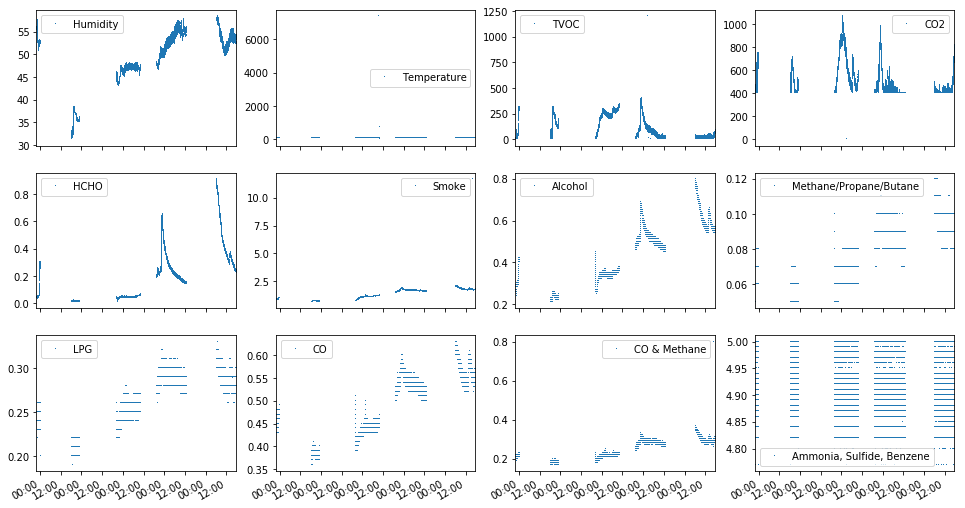

In [29]:
earlyjune.suite.SuitePlot()

In [24]:
#march = SuitePanda2.fileload('archive/suite20190528.txt')
#march = march.append(SuitePanda2.fileload('archive/suite20190529.txt'))
#march = march.append(SuitePanda2.fileload('archive/suite20190530.txt'))
may = SweetPanda.loc['2019-05-01':'2019-05-31']

/home/rory/Arduino/python/SuitePanda.py:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 1080x576 with 12 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53d9671410>,
       dtype=object))

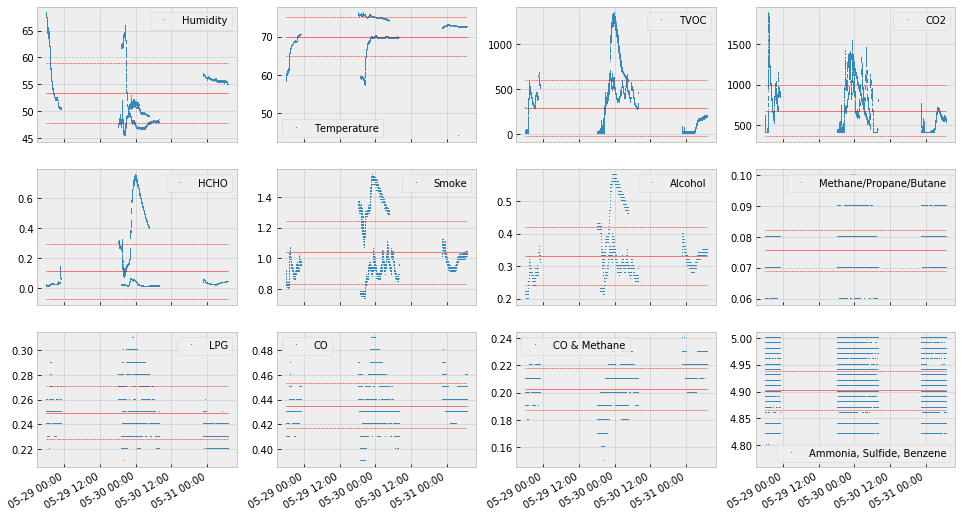

In [25]:
may.suite.SuitePlot()